<a href="https://colab.research.google.com/github/jmlDC/MediaBias-Thesis22-23/blob/Modeling/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

dir  = "/content/gdrive/MyDrive/THESIS-MS/Git-Thesis22-23/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
import pandas as pd

In [38]:
df = pd.read_csv(f'{dir}output_gru_lstm/curated_dataset-withTrad-last.csv')
df

,Text,Annotate,LSTM_framing,GRU_framing,LR_framing,SVM_framing
0,"DOH logs 1,920 new COVID-19 cases, highest dai...",2.0,11.0,11.0,2.0,5.0
1,"The Philippines on Sunday registered 1,920 ne...",14.0,11.0,11.0,5.0,5.0
2,"According to GMA Integrated News Research, th...",11.0,11.0,11.0,9.0,5.0
3,"It is the fourth straight day of more than 1,...",9.0,11.0,11.0,2.0,5.0
4,Data from the Department of Health's COVID-19...,9.0,11.0,2.0,2.0,9.0
...,...,...,...,...,...,...
19995,“Itataas natin ang ating alert status. Magpap...,7.0,7.0,7.0,7.0,7.0
19996,(We will raise our alert status. We will depl...,8.0,8.0,8.0,8.0,7.0
19997,“Bukas o mamayang gabi ay ibababa ang heighte...,8.0,8.0,8.0,13.0,13.0
19998,(The heightened alert status will be raised e...,8.0,8.0,8.0,13.0,5.0


In [39]:
for x in  df.columns:
    if (x!= 'Text'):
        df[x] = df[x].astype(int)

df

,Text,Annotate,LSTM_framing,GRU_framing,LR_framing,SVM_framing
0,"DOH logs 1,920 new COVID-19 cases, highest dai...",2,11,11,2,5
1,"The Philippines on Sunday registered 1,920 ne...",14,11,11,5,5
2,"According to GMA Integrated News Research, th...",11,11,11,9,5
3,"It is the fourth straight day of more than 1,...",9,11,11,2,5
4,Data from the Department of Health's COVID-19...,9,11,2,2,9
...,...,...,...,...,...,...
19995,“Itataas natin ang ating alert status. Magpap...,7,7,7,7,7
19996,(We will raise our alert status. We will depl...,8,8,8,8,7
19997,“Bukas o mamayang gabi ay ibababa ang heighte...,8,8,8,13,13
19998,(The heightened alert status will be raised e...,8,8,8,13,5


In [23]:
df.rename(columns = {'Annotate':'BERT-code_frames', 
                     'LSTM_framing':'LSTM-code_frames', 
                     'GRU_framing':'GRU-code_frames', 
                     'LR_framing':'LR-code_frames',
                     'SVM_framing':'SVM-code_frames'
                     }, inplace = True)

In [40]:
df.to_csv(f'{dir}output_gru_lstm/Curated_dataset-20k.csv', index=False)

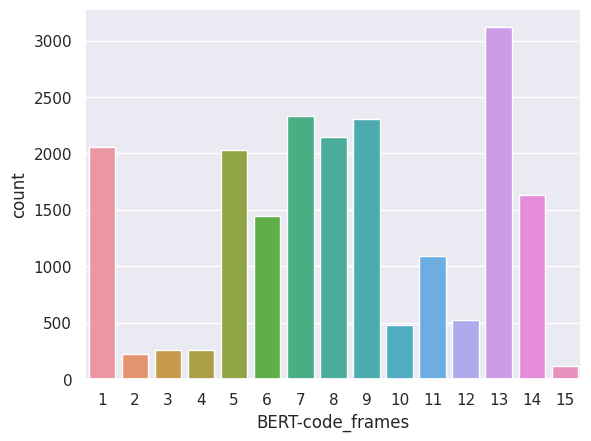

In [24]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="BERT-code_frames", data=df)

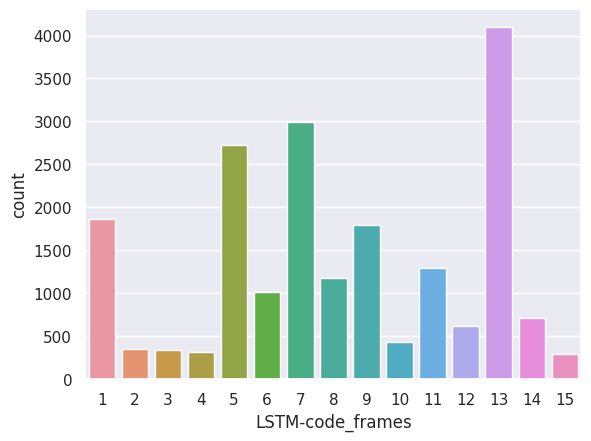

In [25]:

sns.set(style="darkgrid")
ax = sns.countplot(x="LSTM-code_frames", data=df)


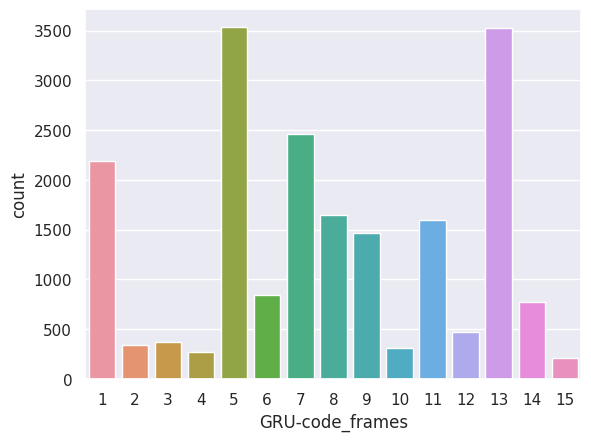

In [26]:
sns.set(style="darkgrid")
ax = sns.countplot(x="GRU-code_frames", data=df)

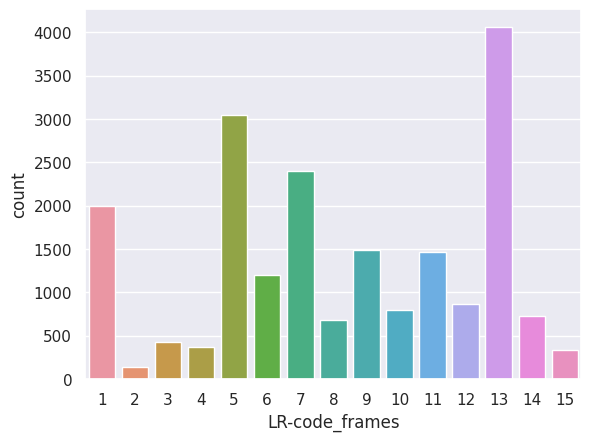

In [27]:
ax = sns.countplot(x="LR-code_frames", data=df)

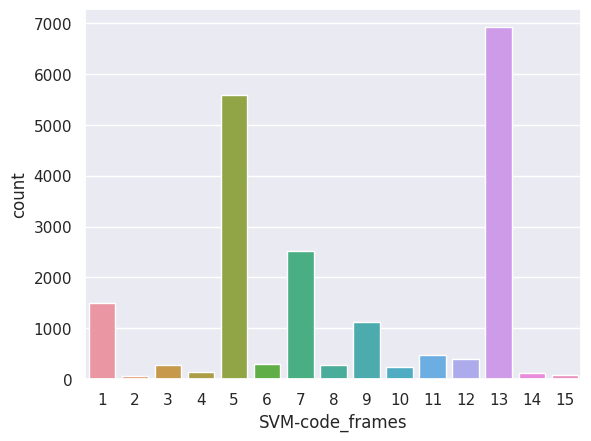

In [28]:
ax = sns.countplot(x="SVM-code_frames", data=df)

<Axes: xlabel='LR-code_frames', ylabel='count'>

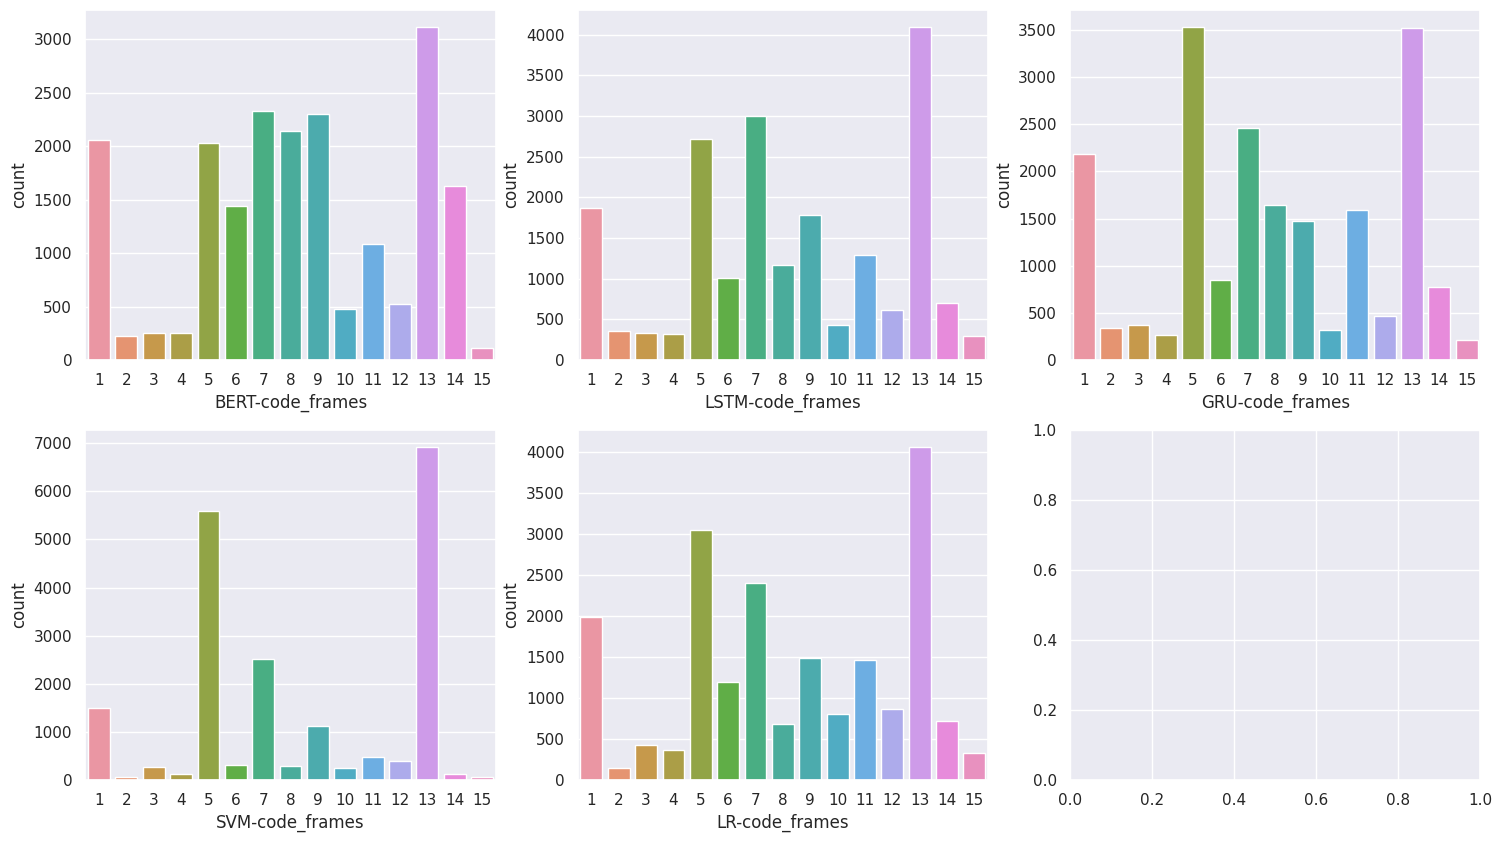

In [29]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# fig.suptitle('Code Frames for each Model')

# sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')

sns.countplot(ax=axes[0,0], data=df, x="BERT-code_frames" )
sns.countplot(ax=axes[0,1], data=df, x="LSTM-code_frames" )
sns.countplot(ax=axes[0,2], data=df, x="GRU-code_frames" )
sns.countplot(ax=axes[1,0], data=df, x="SVM-code_frames" )
sns.countplot(ax=axes[1,1], data=df, x="LR-code_frames" )

<Axes: xlabel='GRU-code_frames', ylabel='count'>

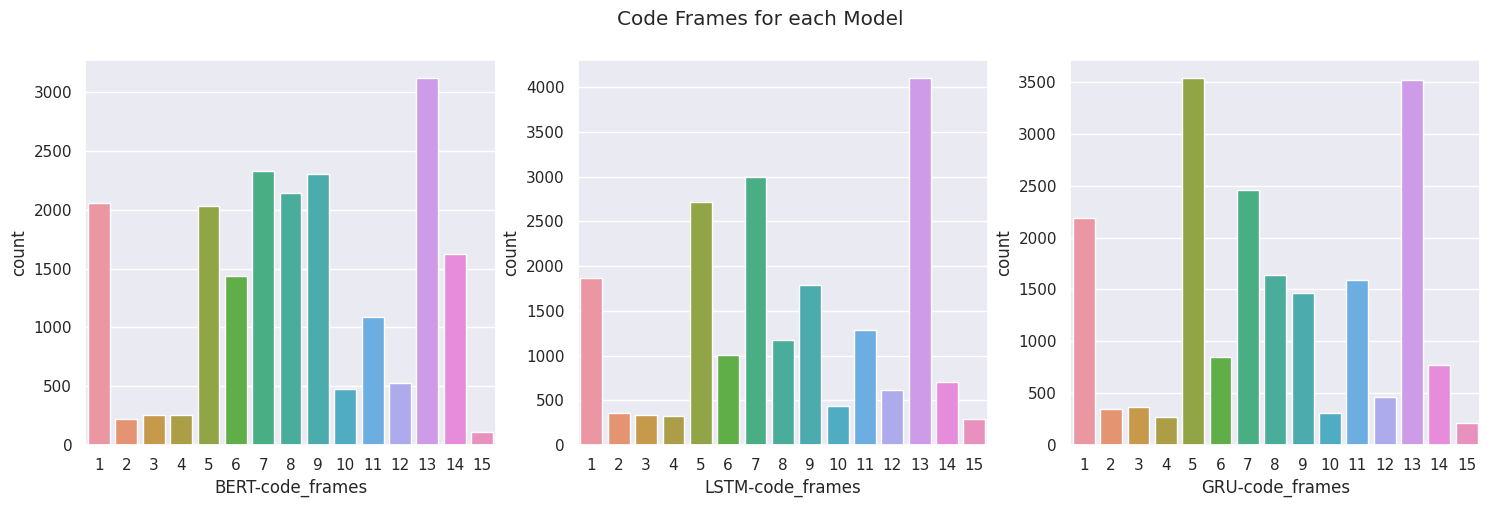

In [30]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

fig.suptitle('Code Frames for each Model')

# sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')

sns.countplot(ax=axes[0], data=df, x="BERT-code_frames" )
sns.countplot(ax=axes[1], data=df, x="LSTM-code_frames" )
sns.countplot(ax=axes[2], data=df, x="GRU-code_frames" )


<Axes: xlabel='LR-code_frames', ylabel='count'>

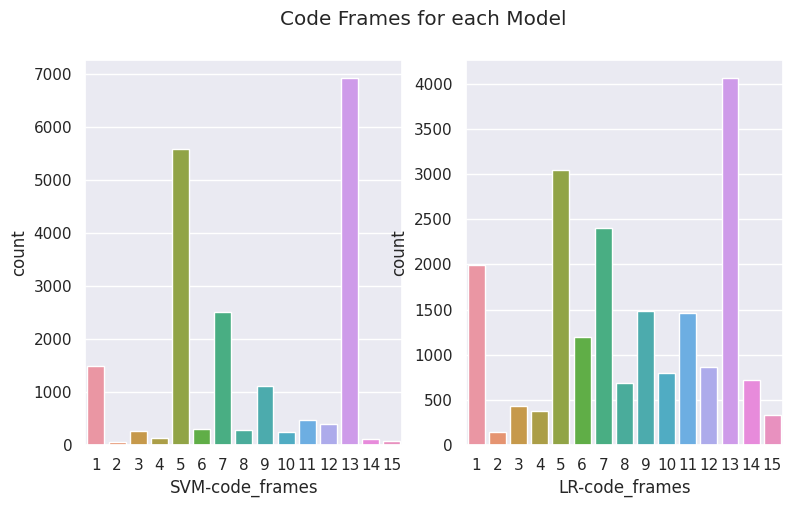

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))
fig.suptitle('Code Frames for each Model')

sns.countplot(ax=axes[0], data=df, x="SVM-code_frames" )
sns.countplot(ax=axes[1], data=df, x="LR-code_frames" )

In [32]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
!git clone https://github.com/tctianchi/pyvenn.git
%cd pyvenn

# https://github.com/tctianchi/pyvenn

Cloning into 'pyvenn'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 42 (delta 0), reused 2 (delta 0), pack-reused 39
Unpacking objects: 100% (42/42), 19.63 KiB | 207.00 KiB/s, done.
/content/pyvenn


In [34]:
# from itertools import combinations


# df['B+L'] = df['BERT-code_frames'] == df['LSTM-code_frames'] 
# df

0        False
1        False
2         True
3        False
4        False
         ...  
19995     True
19996     True
19997     True
19998     True
19999    False
Name: B+L, Length: 20000, dtype: bool